In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
import math

In [3]:
data_path = "outputs/dataByLocation_2020-11-21-16-00-26_5FNYF6H05HB089022.csv"
dataByLocation = pd.read_csv(data_path)

Text(0, 0.5, 'Speed (km/h)')

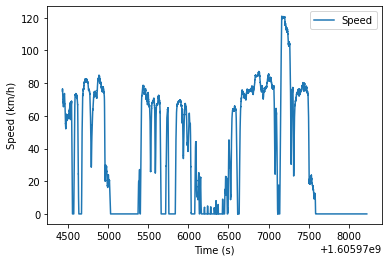

In [4]:
speedOverTime = dataByLocation.plot.line(x="Time", y="Speed")

speedOverTime.set_xlabel("Time (s)")
speedOverTime.set_ylabel("Speed (km/h)")

Text(0, 0.5, 'Steer Angle (deg)')

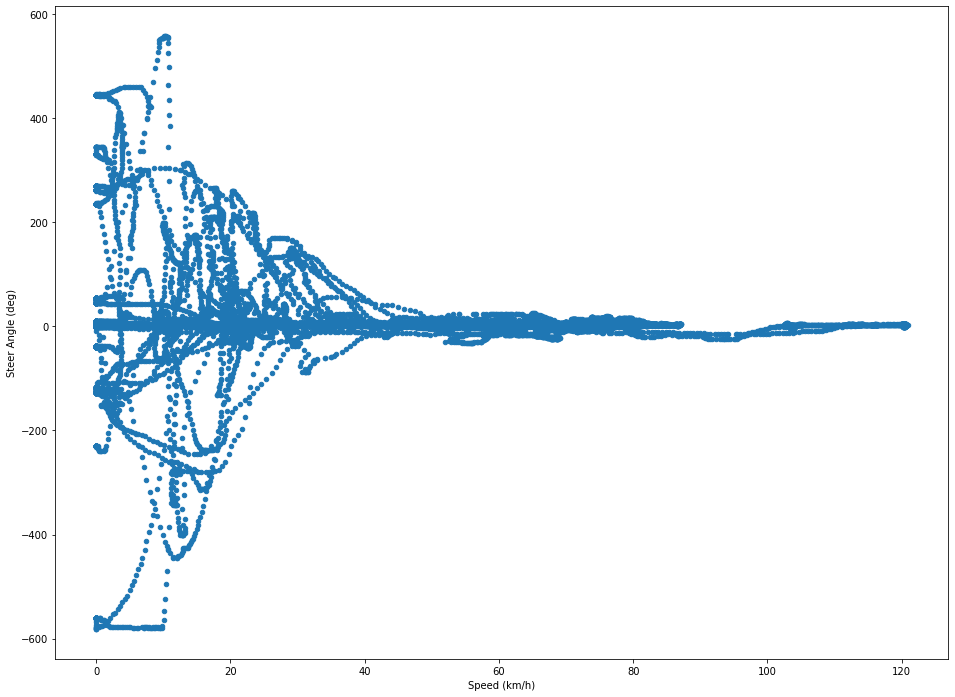

In [5]:
fig, axs = plt.subplots(1)

fig.set_size_inches(16,12)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

steerAngleOverSpeed = dataByLocation.plot.scatter(x="Speed", y="SteerAngle", ax=axs)

steerAngleOverSpeed.set_xlabel("Speed (km/h)")
steerAngleOverSpeed.set_ylabel("Steer Angle (deg)")

Text(0.5, 1.0, 'Total Acceleration Over Time')

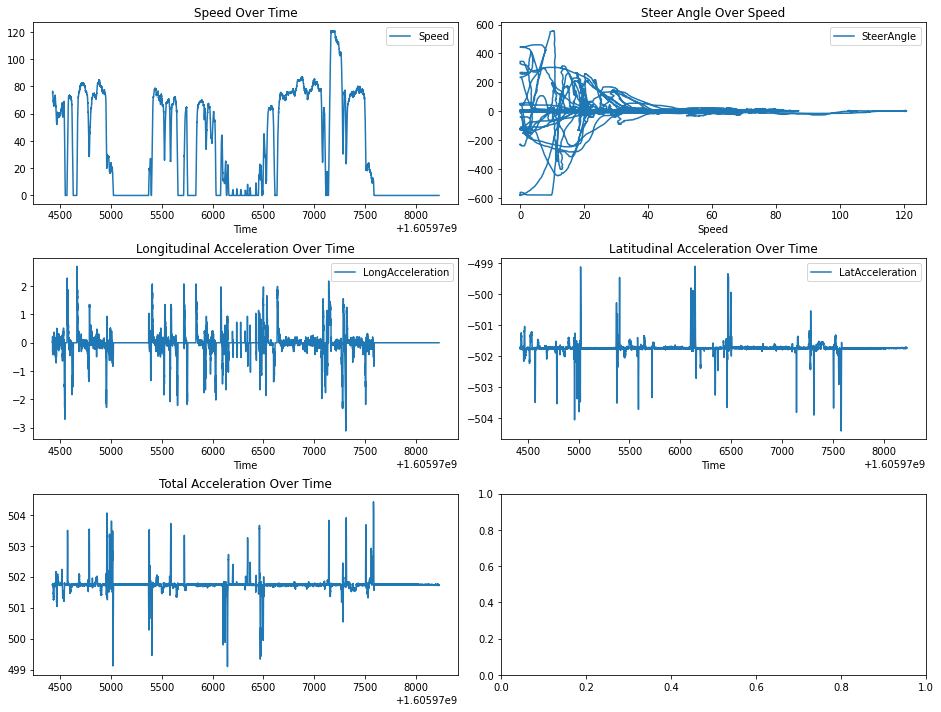

In [6]:
fig, axs = plt.subplots(3,2)

fig.set_size_inches(16,12)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

dataByLocation.plot.line(x="Time", y="Speed", title="Speed Over Time", ax=axs[0][0])
dataByLocation.plot.line(x="Speed", y="SteerAngle", title="Steer Angle Over Speed", ax=axs[0][1])
dataByLocation.plot.line(x="Time", y="LongAcceleration", title="Longitudinal Acceleration Over Time", ax=axs[1][0])
dataByLocation.plot.line(x="Time", y="LatAcceleration", title="Latitudinal Acceleration Over Time", ax=axs[1][1])
axs[2][0].plot(dataByLocation["Time"], [math.sqrt((dataByLocation.iloc[i]["LongAcceleration"]**2) + (dataByLocation.iloc[i]["LatAcceleration"]**2)) for i in range(len(dataByLocation))])
axs[2][0].set_title("Total Acceleration Over Time")

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = dataByLocation.drop(columns=['Longitude','Latitude','Time','SteerTorque']).to_numpy()

# Standardize the features
X = StandardScaler().fit_transform(X)

# Instantiate PCA
pca = PCA(n_components=3)

# Fit PCA to features
principalComponents = pca.fit_transform(X)

In [8]:
deltas = []
lastRecord = None
for record in dataByLocation.iterrows():
    if lastRecord == None:
        deltas.append({"longDelta": 0, "latDelta": 0})
    else:
        deltas.append({"longDelta": record[1]["Longitude"] - lastRecord[1]["Longitude"], "latDelta": record[1]["Latitude"] - lastRecord[1]["Latitude"]})
    lastRecord = record

In [20]:
# Create a new dataset from principal components 
df = pd.DataFrame(data = principalComponents, 
                  columns = ['PC1', 'PC2', 'PC3'])

longTarget = pd.Series([x["longDelta"] for x in deltas], name='longTarget')
latTarget = pd.Series([x["latDelta"] for x in deltas], name='latTarget')

result_df = pd.concat([df, longTarget, latTarget], axis=1)
result_df

,PC1,PC2,PC3,longTarget,latTarget
0,2.457762,-0.082889,-0.018844,0.0,0.000000
1,2.459422,-0.091242,-0.003483,0.0,-0.000019
2,2.457464,-0.123697,-0.039983,0.0,-0.000019
3,2.473837,-0.162139,-0.219220,0.0,-0.000019
4,2.481754,-0.106942,-0.210806,0.0,-0.000019
...,...,...,...,...,...
37853,-2.358400,-0.178265,0.024958,0.0,0.000000
37854,-2.358272,-0.197556,0.029203,0.0,0.000000
37855,-2.358400,-0.178265,0.024958,0.0,0.000000
37856,-2.358400,-0.178265,0.024958,0.0,0.000000


In [21]:
Color = [[v, result_df["latTarget"][i]] for i,v in enumerate(result_df["longTarget"])]
len(Color)

37858

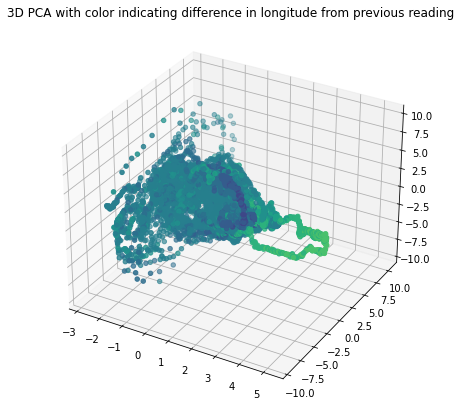

In [22]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(result_df["PC1"],result_df["PC2"],result_df["PC3"], c=result_df["longTarget"])
plt.title("3D PCA with color indicating difference in longitude from previous reading")
 
# show plot
plt.show()

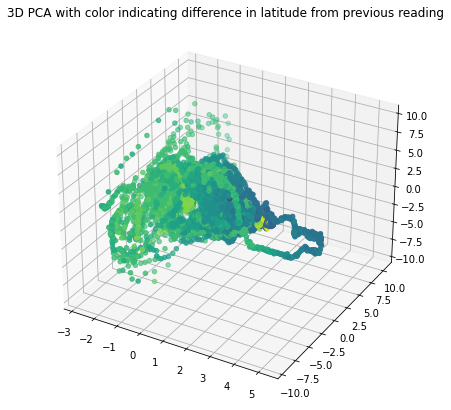

In [23]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(result_df["PC1"],result_df["PC2"],result_df["PC3"], c=result_df["latTarget"])
plt.title("3D PCA with color indicating difference in latitude from previous reading")
 
# show plot
plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys

dataWithExclusions = dataByLocation.drop(columns=['Longitude','Latitude','Time','SteerTorque'])
X = dataWithExclusions.to_numpy()

# Standardize the features
X = StandardScaler().fit_transform(X)

# Instantiate PCA
pca = PCA()

# Fit PCA to features
principalComponents = pca.fit_transform(X)
X_tranformed = principalComponents

X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / X.shape[0]
eigenvalues = pca.explained_variance_
eigenvectors = []
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
    print(eigenvalue)
    print(eigenvector)
    eigenvectors.append(eigenvector)
vectorDF = pd.DataFrame(eigenvectors)
# np.set_printoptions(threshold=10)
# principalComponents
values = []
for vector in vectorDF.iterrows():
    valueSum = 0
    for value in vector:
        if not isinstance(value, int):
            for subvalue in value:
                valueSum+=subvalue
    values.append(valueSum)
vectorDF["sum"] = values
vectorDF

5.213223730473401
[ 0.43634757  0.00528489  0.00079036 -0.00306993  0.21911285  0.43628882
  0.43638589  0.43638295  0.43628169]
1.1860225496201982
[-0.04706811 -0.79746391 -0.10672541  0.31441978  0.49260728 -0.05107477
 -0.04318039 -0.0428562  -0.05112764]
1.0014688383033
[ 0.01322017  0.17549352 -0.9104422   0.349959   -0.13006187  0.01421766
  0.01231176  0.01286044  0.01468853]
0.9805240759731874
[-0.02232544 -0.15422268 -0.39893051 -0.87704368  0.21310815 -0.02295498
 -0.02136952 -0.02110991 -0.02283579]
0.6189574466131145
[-0.08167014  0.55618111  0.02362356  0.09723079  0.80436083 -0.07918972
 -0.08470805 -0.08509322 -0.07935365]
2.099247477084965e-05
[ 6.74892930e-01 -5.22625473e-04 -6.31405605e-04 -9.14214491e-05
 -3.29543855e-04  1.32102330e-01  1.82426749e-01 -5.41853892e-01
 -4.47417657e-01]
1.0097839694785756e-05
[-5.86626771e-01 -6.37556464e-04 -1.97553992e-04  1.07945507e-04
  5.64745914e-05  5.02893484e-01  5.37176209e-01 -3.02892493e-01
 -1.50547577e-01]
5.93937131838

,0,1,2,3,4,5,6,7,8,sum
0,0.436348,0.005285,0.000790,-0.003070,0.219113,0.436289,0.436386,0.436383,0.436282,2.403805
1,-0.047068,-0.797464,-0.106725,0.314420,0.492607,-0.051075,-0.043180,-0.042856,-0.051128,-0.332469
2,0.013220,0.175494,-0.910442,0.349959,-0.130062,0.014218,0.012312,0.012860,0.014689,-0.447753
3,-0.022325,-0.154223,-0.398931,-0.877044,0.213108,-0.022955,-0.021370,-0.021110,-0.022836,-1.327684
4,-0.081670,0.556181,0.023624,0.097231,0.804361,-0.079190,-0.084708,-0.085093,-0.079354,1.071382
5,0.674893,-0.000523,-0.000631,-0.000091,-0.000330,0.132102,0.182427,-0.541854,-0.447418,-0.001425
6,-0.586627,-0.000638,-0.000198,0.000108,0.000056,0.502893,0.537176,-0.302892,-0.150548,-0.000668
7,0.019289,-0.010082,0.000071,-0.000116,0.000073,0.511889,-0.570215,-0.433966,0.473313,-0.009743
8,-0.007661,0.001011,0.000016,0.000013,-0.000040,0.517359,-0.391071,0.475611,-0.594254,0.000984


In [12]:
deltas = []
lastRecord = None
for record in dataByLocation.iterrows():
    if lastRecord == None:
        deltas.append({"longDelta": 0, "latDelta": 0})
    else:
        deltas.append({"longDelta": record[1]["Longitude"] - lastRecord[1]["Longitude"], "latDelta": record[1]["Latitude"] - lastRecord[1]["Latitude"]})
    lastRecord = record

In [13]:
# Create a new dataset from principal components 
df = pd.DataFrame(data = principalComponents, 
                  columns = ['PC1', 'PC2'])

longTarget = pd.Series([x["longDelta"] for x in deltas], name='longTarget')
latTarget = pd.Series([x["latDelta"] for x in deltas], name='latTarget')

result_df = pd.concat([df, longTarget, latTarget], axis=1)
result_df

,PC1,PC2,longTarget,latTarget
0,2.457762,-0.082889,0.0,0.000000
1,2.459422,-0.091242,0.0,-0.000019
2,2.457464,-0.123697,0.0,-0.000019
3,2.473837,-0.162139,0.0,-0.000019
4,2.481754,-0.106942,0.0,-0.000019
...,...,...,...,...
37853,-2.358400,-0.178265,0.0,0.000000
37854,-2.358272,-0.197556,0.0,0.000000
37855,-2.358400,-0.178265,0.0,0.000000
37856,-2.358400,-0.178265,0.0,0.000000


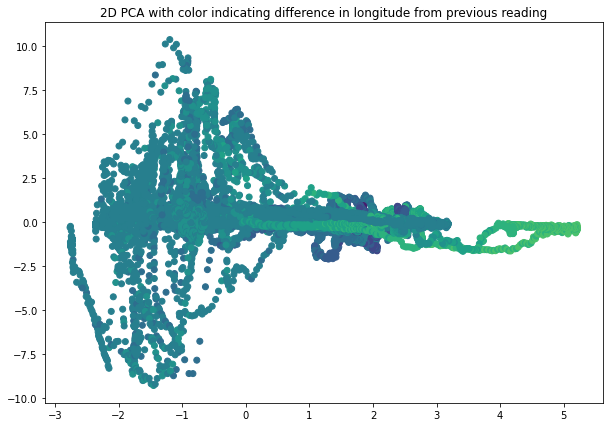

In [56]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes()
 
# Creating plot
ax.scatter(result_df["PC1"],result_df["PC2"], c=result_df["longTarget"])
plt.title("2D PCA with color indicating difference in longitude from previous reading")
 
# show plot
plt.show()

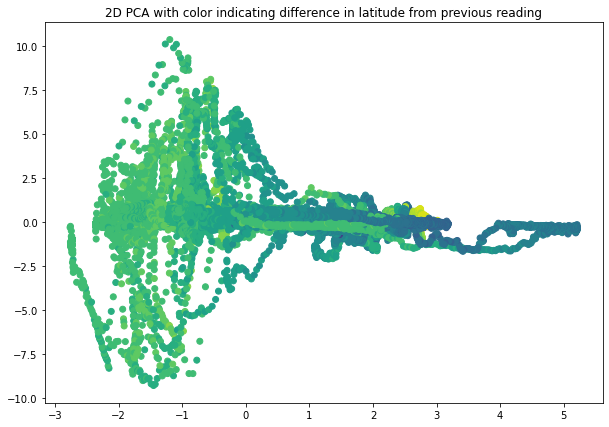

In [57]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes()
 
# Creating plot
ax.scatter(result_df["PC1"],result_df["PC2"], c=result_df["latTarget"])
plt.title("2D PCA with color indicating difference in latitude from previous reading")
 
# show plot
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

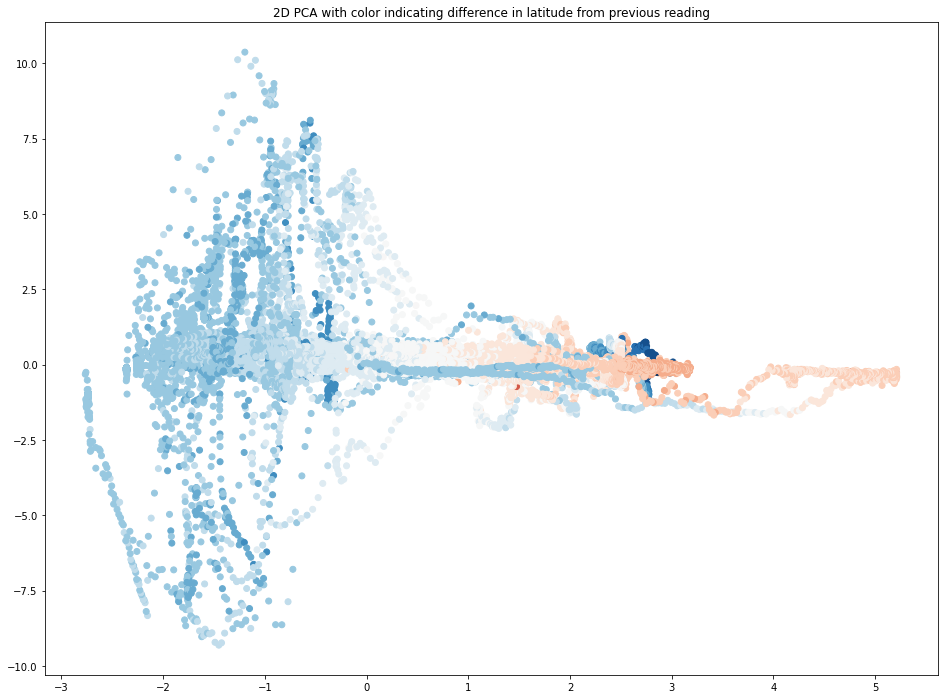

In [27]:
fig, axs = plt.subplots(1)

fig.set_size_inches(16,12)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

axs.scatter(result_df["PC1"],result_df["PC2"], cmap='RdBu', c=result_df["latTarget"])
plt.title("2D PCA with color indicating difference in latitude from previous reading")
plt.colorbar()


# steerAngleOverSpeed = dataByLocation.plot.line(x="Speed", y="SteerAngle", ax=axs)

# speedOverTime.set_xlabel("Speed (km/h)")
# speedOverTime.set_ylabel("Steer Angle (deg)")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter
raw = pd.read_csv("raw_data/libpanda/2021_02_11/2021-02-11-18-44-47_2T3Y1RFV8KC014025_CAN_Messages.csv")

In [2]:
raw

,Time,Bus,MessageID,Message,MessageLength
0,1.613069e+09,0,467,082800000000000c,8
1,1.613069e+09,0,705,080027002dc100e8,8
2,1.613069e+09,0,740,de000000c9,5
3,1.613069e+09,0,658,000000000200009e,8
4,1.613069e+09,0,464,06a609000000018f,8
...,...,...,...,...,...
2651501,1.613070e+09,2,608,0000590006008b54,8
2651502,1.613070e+09,2,830,02085f80002000,7
2651503,1.613070e+09,0,830,02085f80002000,7
2651504,1.613070e+09,0,610,00080002580000ce,8


In [8]:
ids = set()
for i,message in raw.iterrows():
    ids.add(message.MessageID)

In [12]:
",".join([str(id) for id in ids])

'1541,387,1552,1041,1553,1042,1556,1557,1044,544,1568,1056,1571,36,37,550,1059,552,1063,1570,1572,388,1941,562,1076,565,1077,1592,1082,1595,1084,1085,1086,1594,576,577,578,579,580,581,582,583,584,1088,1089,1948,1949,1104,1114,1952,608,610,1132,1649,1956,643,1161,1162,1163,1164,1165,1166,1167,658,1172,1696,1940,170,180,186,705,1973,1228,1745,1235,1237,728,740,742,743,1775,1264,1779,761,1786,1787,764,765,1788,1279,1789,1808,1809,1816,1817,800,291,296,810,812,814,304,1841,818,1840,1846,824,1848,829,830,835,836,352,865,353,869,870,871,877,1904,881,882,885,1912,889,896,384,898,385,900,386,902,391,392,905,393,394,395,396,397,398,399,401,400,402,403,404,918,405,406,921,407,408,409,410,411,412,413,414,415,416,417,933,934,935,418,419,426,389,390,1960,1964,944,945,436,437,438,951,439,440,441,955,956,442,443,1981,1986,452,1990,1994,1998,464,976,466,467,977,978,979,2004,2000,2008,987,2012,998,999,1000,1001,1002,1014,1017,1020'

In [6]:
def to_histogram(interval, can_data_df, message_ids, counterWidget):
    '''Converts the dataframe to a histogram representation.'''
    for i_d in message_ids:
            can_data_df[i_d] = [0 for i in range (len(can_data_df))]
#             test_data_df[i_d] = [0 for i in range (len(test_data_df))]
            
    can_data_df = can_data_df.reset_index(drop=True)
    for current_index, row in can_data_df.iterrows():
        counterWidget.value = str(current_index) + "/" + str(len(can_data_df))
        current_time = row['Time']
        
        first_time_index = can_data_df.index.get_loc(current_time - interval, method='nearest')
        
        # loop through previous message IDs
        for i in range (first_time_index, current_index + 1):
            m = can_data_df['MessageID'][i]
            can_data_df[m][current_index] += 1
            
#     test_data_df = test_data_df.reset_index(drop=True)
#     for current_index, row in test_data_df.iterrows():
        
#         current_time = row['Time']
#         first_time_index = test_data_df.index.get_loc(current_time - interval, method='nearest')
        
#         # loop through previous message IDs
#         for i in range (first_time_index, current_index + 1):
#             m = test_data_df['MessageID'][i]
#             test_data_df[m][current_index] += 1
            
    return can_data_df#, test_data_df

Counter(raw.MessageID.to_numpy())

Counter({467: 44045,
         705: 44049,
         740: 58256,
         658: 43704,
         464: 44051,
         743: 43696,
         170: 139852,
         180: 69914,
         37: 139838,
         552: 69905,
         544: 46600,
         562: 46601,
         565: 46601,
         1556: 1461,
         452: 59369,
         945: 1399,
         608: 69915,
         610: 34965,
         1020: 27966,
         466: 44057,
         643: 43696,
         742: 43692,
         550: 46604,
         426: 27965,
         36: 69913,
         401: 72203,
         812: 27962,
         951: 4661,
         976: 12562,
         1557: 179,
         818: 13989,
         186: 46617,
         800: 27963,
         810: 27962,
         835: 43699,
         987: 1399,
         1082: 1399,
         1132: 7342,
         865: 21676,
         836: 29135,
         869: 6992,
         829: 5597,
         1017: 5595,
         882: 14563,
         881: 7082,
         824: 13987,
         1228: 1363,
         830: 6993,

In [6]:

counter = widgets.Label(value="0/0")
items = [counter]
box = widgets.VBox(children=items, layout=widgets.Layout(flex_direction="row"))
box

In [ ]:
selectedIDs = [180,37,550,552,608,800,1556,37]
to_histogram(3, raw, selectedIDs, counter)